## **EXPLORATORY DATA ANALYSIS**

In [1]:
# importing libraries for eda
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load the two datasets
df = pd.read_csv('/home/astrosanderson/Desktop/telecom-churn-prediction/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_enc = pd.read_csv('/home/astrosanderson/Desktop/telecom-churn-prediction/data/processed/telecom_churn_processed.csv')

In [3]:
# previewing the dataset
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### 1. *Visualize churn distribution*

/tmp/ipykernel_9161/4037137112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Churn'], data=df, palette='Set2')


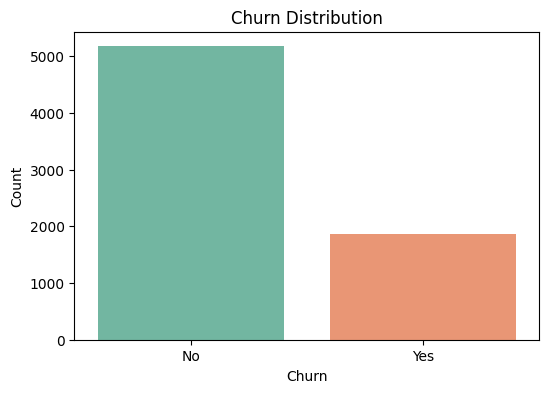

In [4]:
# Visualize churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Churn'], data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

*This distribution shows that a lot of people are still with the company but a significant amount of people have left*

### 2. *Correlation analysis*

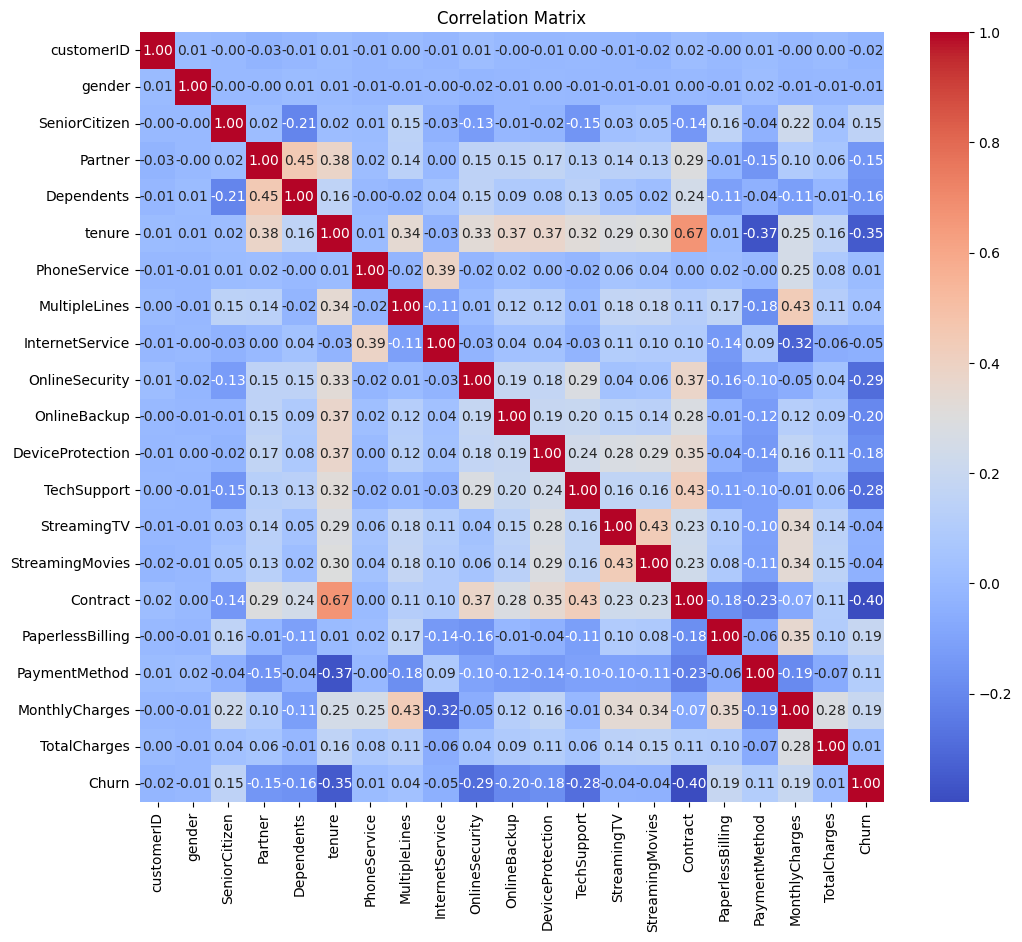

In [5]:
# Correlation analysis
plt.figure(figsize=(12,10))
correlation_matrix = df_enc.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

*Looking our target, Churn, we can see a correlation with **MonthlyCharges, PaperlessBilling, SeniorCitizen and lastly PaymentMethod.** These are the variables with high correlations which means we might use them in the prediction model.*

### 3. *Compare churn vs. contract type, tenure, payment method, etc.*

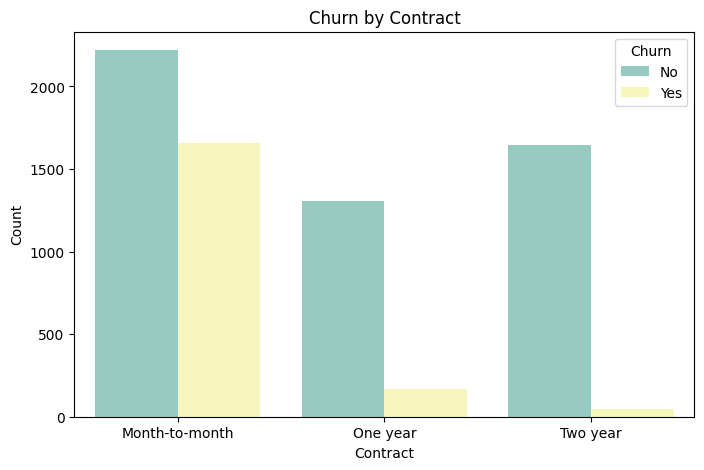

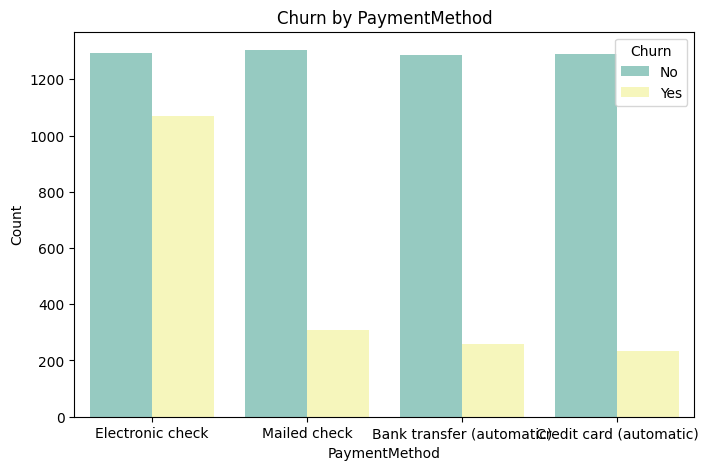

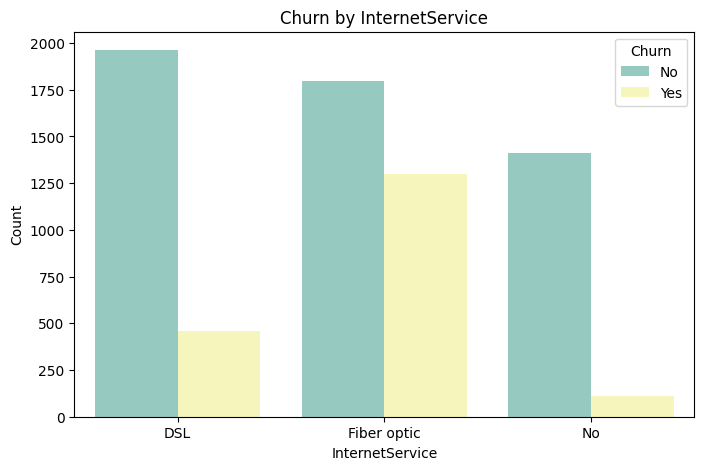

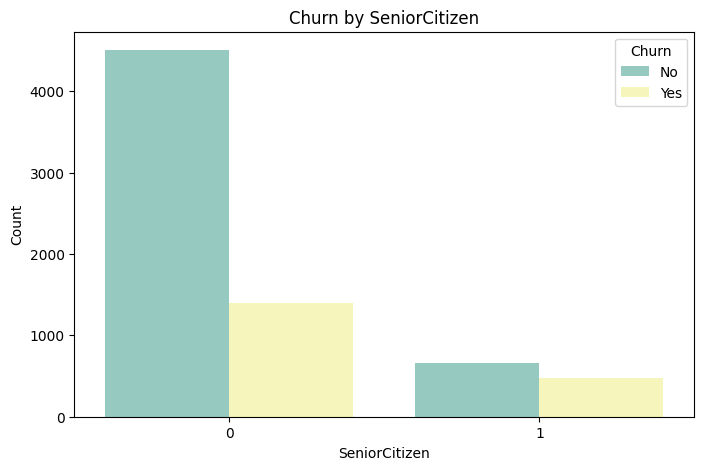

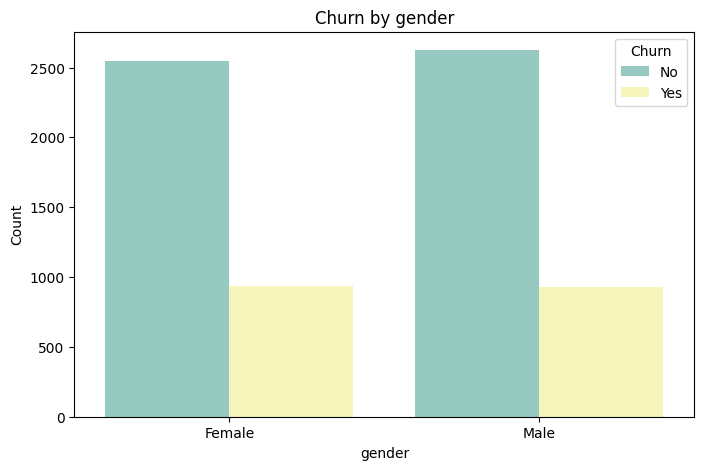

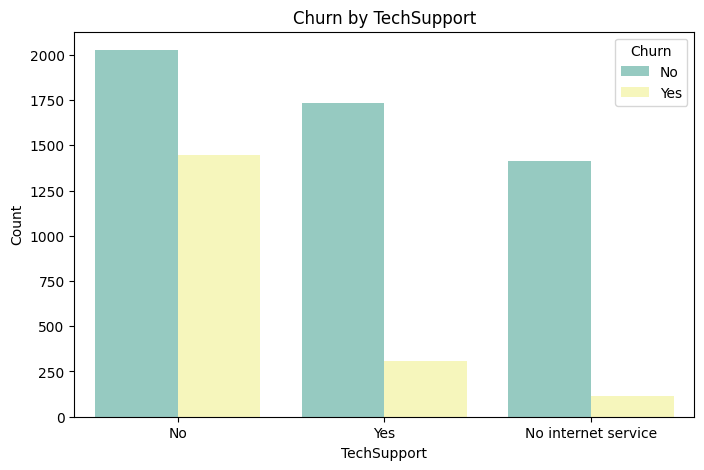

In [6]:
# Compare churn vs. contract type, tenure, payment method, etc.
categorical_features = ['Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen', 'gender', 'TechSupport']
for feature in categorical_features:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df[feature], hue=df['Churn'], palette='Set3')
    plt.title(f'Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.show()

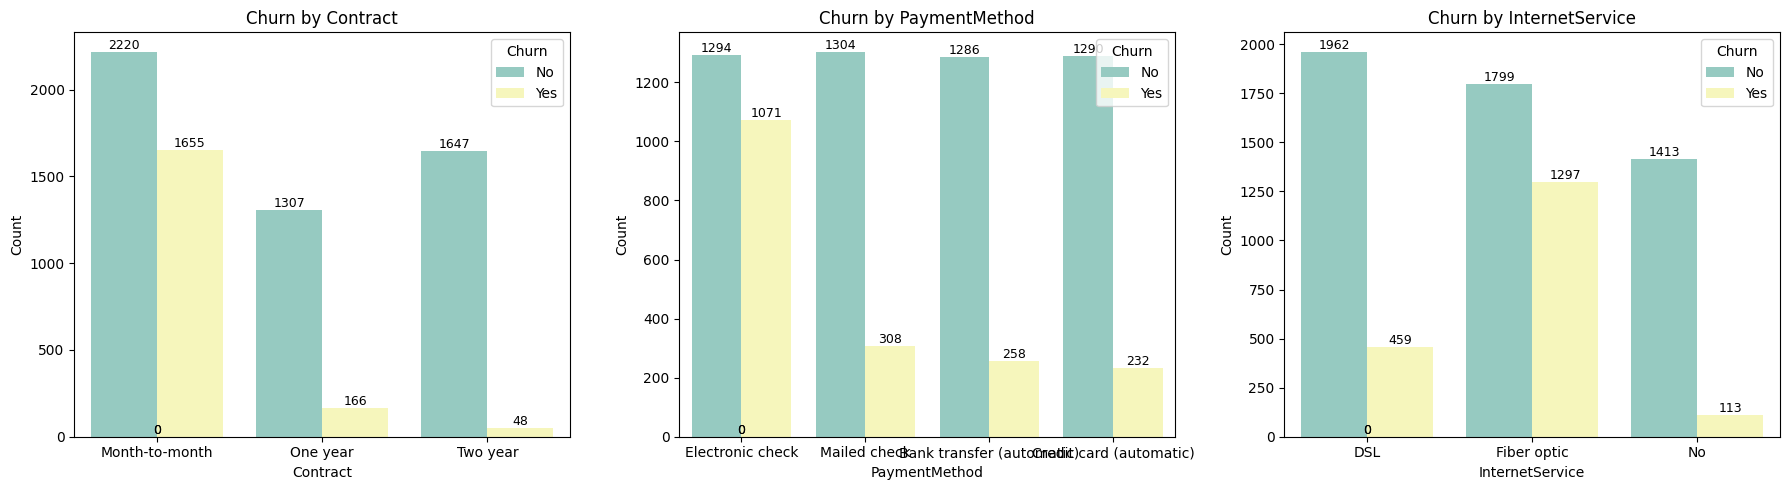

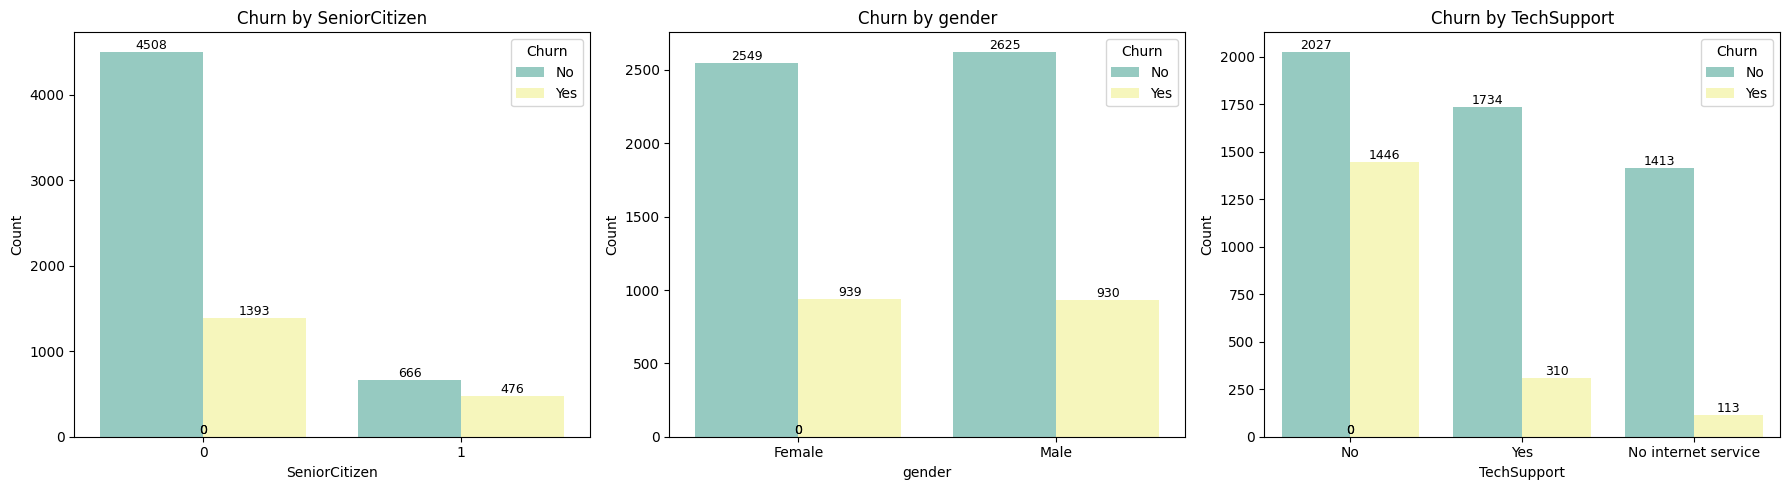

In [ ]:
# Combine selected categorical churn plots into a single figure with subplots
categorical_features = ['Contract', 'PaymentMethod', 'InternetService']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(18,5))
for ax, feature in zip(axes, categorical_features):
    sns.countplot(x=df[feature], hue=df['Churn'], palette='Set3', ax=ax)
    ax.set_title(f'Churn by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='upper right')
    # Annotate bars with counts
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax.annotate(f'{int(height)}', (p.get_x()+p.get_width()/2., height),
                        ha='center', va='bottom', fontsize=9, rotation=0)
plt.tight_layout()
plt.show()

categorical_features = ['SeniorCitizen', 'gender', 'TechSupport']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(18,5))
for ax, feature in zip(axes, categorical_features):
    sns.countplot(x=df[feature], hue=df['Churn'], palette='Set3', ax=ax)
    ax.set_title(f'Churn by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='upper right')
    # Annotate bars with percentages
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax.annotate(f'{int(height)}', (p.get_x()+p.get_width()/2., height),
                        ha='center', va='bottom', fontsize=9, rotation=0)
plt.tight_layout()
plt.show()

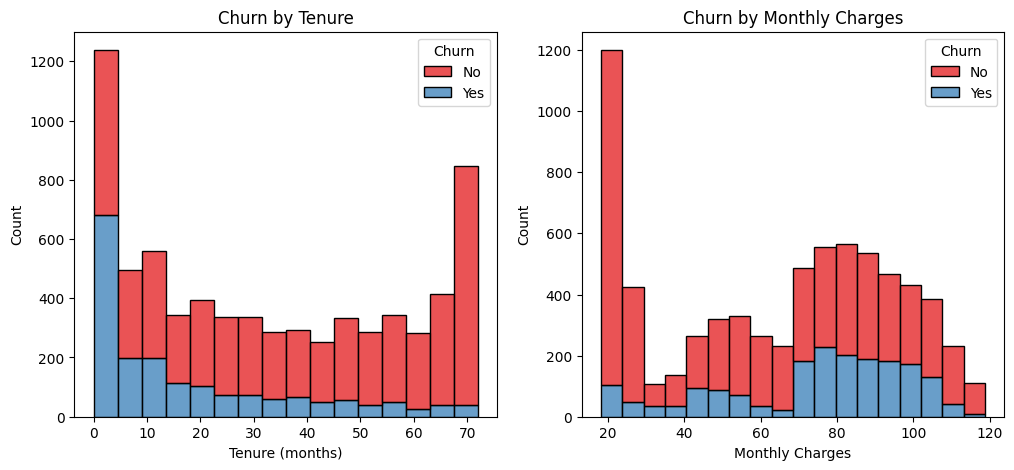

In [8]:
# Churn vs Tenure, MonthlyCharges
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='Set1')
plt.title('Churn by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', palette='Set1')
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

### 4. *Save visuals*

In [10]:
# save figurres to reports/figures directory